In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

In [2]:
df=pd.read_csv('homeprices.csv')
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


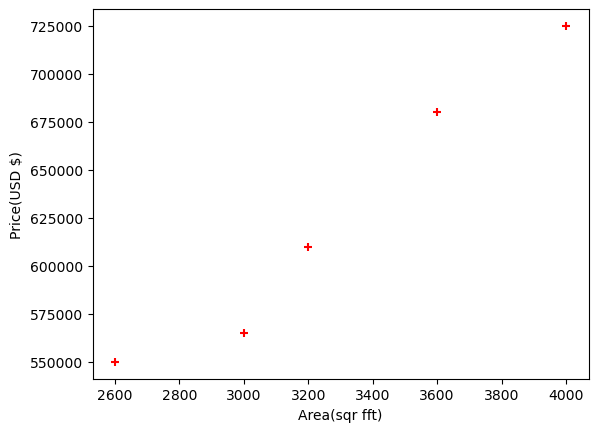

In [3]:
plt.xlabel('Area(sqr fft)')
plt.ylabel('Price(USD $)')
plt.scatter(df.Area,df.Price,color='red',marker='+')

In [5]:
r=lr()
r.fit(df[['Area']], df.Price)

LinearRegression()

In [6]:
r.predict([[3300]])

C:\Users\lkmah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
r.coef_

array([135.78767123])

In [8]:
r.intercept_

180616.43835616432

In [9]:
135.788*3300+190616.438

638716.838

In [11]:
d=pd.read_csv('50_Startups.csv')
x=d.iloc[:,:-1]
y=d.iloc[:,-1].values
d.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import OneHotEncoder as ohe

c=ct(transformers=[('encoder',ohe(),[3])],remainder='passthrough')
x=np.array(c.fit_transform(x))
x

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [14]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [15]:
r1=lr()

In [16]:
r1.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=r1.predict(x_test)

In [18]:
df=pd.DataFrame({'Real Values':y_test,'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,14681.40,51296.209185
1,126992.93,118493.548139
2,156122.51,159891.157386
3,81229.06,66332.707538
4,49490.75,59407.602632
5,132602.65,152460.309565
6,96479.51,87673.774897
7,110352.25,116697.978883
8,101004.64,102473.364283
9,146121.95,136150.310712


In [20]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

15365.735777462485
